time
1    0.070056
2    0.058639
3    0.652706
4    1.256000
5    1.250833
Name: Unnamed: 1, dtype: float64


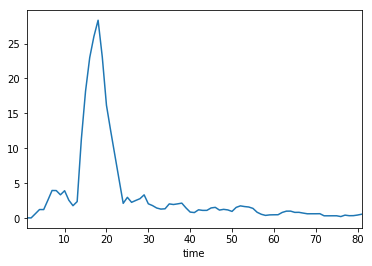

In [5]:

# load and plot dataset
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
# load dataset
#def parser(x):
#    return datetime.strptime('190'+x, '%Y')
series = read_csv('FYP_output_new.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
# summarize first few rows
print(series.head())
# line plot
series.plot()
pyplot.show()

RMSE: 1.948


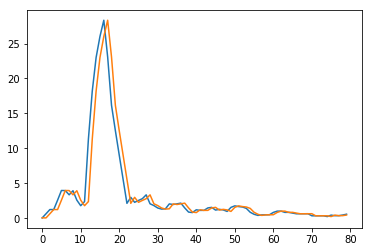

In [11]:


from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
# load dataset
#def parser(x):
#    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('FYP_output_new.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
# split data into train and test
X = series.values
train, test = X[0:-80], X[-80:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # make prediction
    predictions.append(history[-1])
    # observation
    history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

In [12]:

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [6]:

from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
 
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df
 
# load dataset
#def parser(x):
    #return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('FYP_output_new.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
# transform to supervised learning
X = series.values
supervised = timeseries_to_supervised(X, 1)
print(supervised.head())

          0         0
0  0.000000  0.070056
1  0.070056  0.058639
2  0.058639  0.652706
3  0.652706  1.256000
4  1.256000  1.250833


In [7]:

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [8]:

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [12]:

from pandas import read_csv
from pandas import datetime
from pandas import Series
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
 
# load dataset
#def parser(x):
#    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('FYP_output_new.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())
# transform to be stationary
differenced = difference(series, 1)
print(differenced.head())
# invert transform
inverted = list()
for i in range(len(differenced)):
    value = inverse_difference(series, differenced[i], len(series)-i)
    inverted.append(value)
inverted = Series(inverted)
print(inverted.head())

time
1    0.070056
2    0.058639
3    0.652706
4    1.256000
5    1.250833
Name: Unnamed: 1, dtype: float64


KeyError: 0

In [13]:
from pandas import read_csv
from pandas import datetime
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
# load dataset
#def parser(x):
#    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('FYP_output_new.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())
# transform scale
X = series.values
X = X.reshape(len(X), 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X)
scaled_X = scaler.transform(X)
scaled_series = Series(scaled_X[:, 0])
print(scaled_series.head())
# invert transform
inverted_X = scaler.inverse_transform(scaled_X)
inverted_series = Series(inverted_X[:, 0])
print(inverted_series.head())

time
1    0.070056
2    0.058639
3    0.652706
4    1.256000
5    1.250833
Name: Unnamed: 1, dtype: float64
0   -0.999192
1   -1.000000
2   -0.957972
3   -0.915290
4   -0.915656
dtype: float64
0    0.070056
1    0.058639
2    0.652706
3    1.256000
4    1.250833
dtype: float64


Time=1, Predicted=-0.315168, Expected=0.652706
Time=2, Predicted=0.147341, Expected=1.256000
Time=3, Predicted=0.679929, Expected=1.250833
Time=4, Predicted=0.598770, Expected=2.593217
Time=5, Predicted=2.074841, Expected=3.980319
Time=6, Predicted=3.500912, Expected=3.970160
Time=7, Predicted=3.310827, Expected=3.364289
Time=8, Predicted=2.654826, Expected=3.947571
Time=9, Predicted=3.329662, Expected=2.599925
Time=10, Predicted=1.904615, Expected=1.807417
Time=11, Predicted=1.111180, Expected=2.393893
Time=12, Predicted=1.784791, Expected=11.318943
Time=13, Predicted=11.647550, Expected=18.180544
Time=14, Predicted=18.509151, Expected=22.993773
Time=15, Predicted=23.335957, Expected=26.010449
Time=16, Predicted=26.336040, Expected=28.328358
Time=17, Predicted=28.647291, Expected=23.075670
Time=18, Predicted=23.294185, Expected=16.168701
Time=19, Predicted=16.075023, Expected=12.544203
Time=20, Predicted=12.161517, Expected=9.058755
Time=21, Predicted=8.479749, Expected=5.589771
Time=

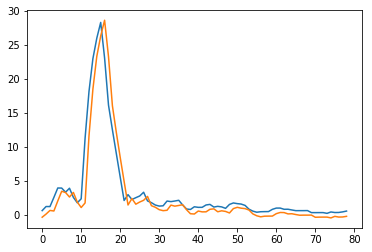

In [28]:

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

# date-time parsing function for loading the dataset
#def parser(x):
#    return datetime.strptime('190'+x, '%f')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0],train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0],test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

# load dataset
series = read_csv('FYP_output_new.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-79], supervised_values[-79:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 1500, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    
    
    yhat = forecast_lstm(lstm_model, 1, X)


   
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    predictions.append(yhat)
    expected = raw_values[len(train) + i + 1]
    print('Time=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

# report performance
rmse = sqrt(mean_squared_error(raw_values[-79:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-79:])
pyplot.plot(predictions)
pyplot.show()

Time=1, Predicted=1.696053, Expected=2.960419
Time=2, Predicted=3.493316, Expected=3.270605
Time=3, Predicted=3.452807, Expected=3.028169
Time=4, Predicted=2.942122, Expected=3.044829
Time=5, Predicted=2.998814, Expected=2.764571
Time=6, Predicted=2.623959, Expected=1.601082
Time=7, Predicted=1.134833, Expected=1.874484
Time=8, Predicted=1.856318, Expected=2.485244
Time=9, Predicted=2.676938, Expected=2.767511
Time=10, Predicted=2.880987, Expected=2.797886
Time=11, Predicted=2.805131, Expected=3.342979
Time=12, Predicted=3.509295, Expected=2.492586
Time=13, Predicted=2.198004, Expected=1.884670
Time=14, Predicted=1.587985, Expected=1.279494
Time=15, Predicted=0.990494, Expected=1.287793
Time=16, Predicted=1.219950, Expected=1.266283
Time=17, Predicted=1.233161, Expected=1.515864
Time=18, Predicted=1.583828, Expected=1.280262
Time=19, Predicted=1.196143, Expected=2.953037
Time=20, Predicted=3.506551, Expected=4.327243
Time=21, Predicted=4.893562, Expected=4.297241
Time=22, Predicted=4.3

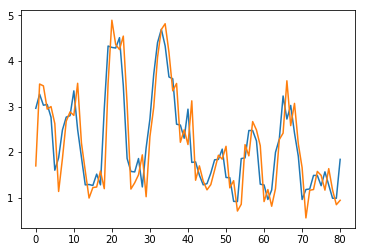

In [64]:

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

# date-time parsing function for loading the dataset
#def parser(x):
#    return datetime.strptime('190'+x, '%f')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0],train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0],test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

# load dataset
series = read_csv('FYP_output_EXO.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-81], supervised_values[-81:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 100, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    
    
    yhat = forecast_lstm(lstm_model, 1, X)


   
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    predictions.append(yhat)
    expected = raw_values[len(train) + i + 1]
    print('Time=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

# report performance
rmse = sqrt(mean_squared_error(raw_values[-81:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-81:])
pyplot.plot(predictions)
pyplot.show()